# Assignment 13: Analyzing World Data with SQL

## Your Information

At the start of each assignment, you will need to provide us your name and the name of the partner you worked with for this assignment (if you had one). Double click on the cell below or click once and hit enter to edit it. Replace "First Last" with your first name and last name. Replace "None" with the first and last name of your partner if you had one for this assignment. We ask for this information so we don't accuse you of cheating when your code looks like your partner's.

Please keep these lines commented so they don't cause an error.

In [1]:
# MY NAME: Hyokyung Kim

# My PARTNER'S NAME: None

## Imports

Every project will begin with some import statements. It's crucial that you run the cell below, otherwise we will not be able to grade your code and provide feedback to you.

In [6]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# we have imported these modules for you

import os
import requests
import copy
import sqlite3
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt

try:
    get_ipython().run_line_magic('matplotlib', 'inline') # running from notebook, show plots
except NameError:
    pass # Not running from notebook, no need to plot
    
import math
import numpy as np # this is *only* for the function get_regression_coeff - do NOT use this module elsewhere

import student_grader
student_grader.initialize(os.getcwd(), "p13")

## Learning Objectives

After completing this assignment, you will be able to...
* query a database using SQL
* process data using `pandas` **DataFrames**
* create different types of plots.

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

**IMPORTANT**: **P12 and P13 are two parts of the same data analysis.** You **cannot** switch project partners between these two projects. That is if you partner up with someone for P12, you have to sustain that partnership until the end of P13. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f24/syllabus.html).

Under any circumstances, **no more than two students are allowed to work together on a project** as mentioned in the course policies. If your code is flagged by our code similarity detection tools, **both partners will be responsible** for sharing/copying the code, even if the code is shared/copied by one of the partners with/from other non-partner student(s). Note that each case of plagiarism will be reported to the Dean of Students with a zero grade on the project. **If you think that someone cannot be your project partner then don’t make that student your lab partner.**

## Project Description:

For your final CS220 project, you're going to continue analyzing world university rankings. However, we will be using a different dataset this time. The data for this project has been extracted from [here](https://www.topuniversities.com/university-rankings/world-university-rankings). Unlike the CWUR rankings we used in P12, the QS rankings dataset has various scores for the universities, and not just the rankings. This makes the QS rankings dataset more suitable for plotting (which you will be doing a lot of!).

In this project, you'll have to dump your DataFrame to a SQLite database. You'll answer questions by doing queries on that database. Often, your answers will be in the form of a plot. Check these carefully, as the tests only verify that a plot has been created, not that it looks correct (the Gradescope autograder will manually deduct points for plotting mistakes).

## Lab Portion (12 questions, 7 functions)

### Section 1: Setup

In P12, you defined a `download` function to download data from the internet and save it to a file. We will be using the same function for this lab and project. We have provided this for you.

In [8]:
# the definition of the 'download' function from P12

def download(url, filename):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    else:
        try:
            r = requests.get(url)
            r.raise_for_status()
            data = r.text
            f = open(filename,"w", encoding="utf-8")
            f.write(data)
            f.close()
            return (str(filename) + " created!")
        except requests.HTTPError:
            return "Download failed!"

#### **Lab Question 1**: Use the `download` function to download `rankings.json`

**Warning:** For the lab and the project, do **not** download the dataset `rankings.json` manually (you **must** use the `download` function, as in P12).

Points possible: 8.0

In [10]:
# use the 'download' function to download the data from the webpage
# 'https://cs220.cs.wisc.edu/projects/data/rankings2.json'
# to the file 'rankings.json'
download_url = 'https://cs220.cs.wisc.edu/projects/data/rankings2.json'
download_result = download(download_url, 'rankings.json')
print(download_result)

rankings.json created!


In [11]:
student_grader.check("lab-q1", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q1...
Great job! You passed all test cases for this question.


True

#### **Lab Question 2**: Create a database called `'rankings.db'` out of 'rankings.json'

You can review the relevant lecture code here: [Mike](https://canvas.wisc.edu/courses/427075/files/folder/Mikes_Lecture_Notes/lec32_database_1), [Louis](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/tree/main/f24/Louis_Lecture_Notes/32_Database1).

Points possible: 8.0

In [19]:
# create a database called 'rankings.db' out of 'rankings.json'

# TODO: load the data from 'rankings.json' into a variable called 'rankings' using pandas' 'read_json' function
rankings = pd.read_json('rankings.json')

# TODO: connect to 'rankings.db' and save it to a variable called 'conn'
conn = sqlite3.connect('rankings.db')

# write the contents of 'rankings' to the table 'rankings' in the database
# we have done this one for you, uncomment the next line
rankings.to_sql("rankings", conn, if_exists="replace", index=False)
# rankings.to_sql("rankings", conn, if_exists="replace", index=False)

1500

In [20]:
student_grader.check("lab-q2", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q2...
Great job! You passed all test cases for this question.


True

#### **Lab Question 3**: Read all the rows in rankings (the database table)

You'll have to use pandas's `read_sql` function to make a query.

Points possible: 8.0

In [26]:
# compute and store the answer in the variable 'rankings', display its head
# remember to display ONLY the head and NOT the whole DataFrame
# uncomment and replace the ... with your code

rankings = pd.read_sql("SELECT * FROM rankings", conn)
rankings.head()

,Year,Rank,Institution Name,Country,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Overall
0,2022,1,Massachusetts Institute of Technology (MIT),United States,100.0,100.0,100.0,100.0,100.0,91.4,NaN,NaN,NaN,100.0
1,2022,2,University of Oxford,United Kingdom,100.0,100.0,100.0,96.0,99.5,98.5,NaN,NaN,NaN,99.5
2,2022,3,Stanford University,United States,100.0,100.0,100.0,99.9,99.8,67.0,NaN,NaN,NaN,98.7
3,2022,3,University of Cambridge,United Kingdom,100.0,100.0,100.0,92.1,100.0,97.7,NaN,NaN,NaN,98.7
4,2022,5,Harvard University,United States,100.0,100.0,99.1,100.0,84.2,70.1,NaN,NaN,NaN,98.0


In [27]:
student_grader.check("lab-q3", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q3...
Great job! You passed all test cases for this question.


True

### Section 2: SQL Practice

In practice, we often are more interested in writing more specific queries about our data. For example, we might be interested in finding institutions in the *United States*, or data collected in the `Year` *2022*, or both. With SQL, **WHERE** and **AND** clauses can help filter the data accordingly.

Before proceeding with this segment, it is **recommended** that you **review** the relevant lecture code: [Mike](https://canvas.wisc.edu/courses/427075/files/folder/Mikes_Lecture_Notes/lec33_database_3), [Louis](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/tree/main/f24/Louis_Lecture_Notes/33_Database2).

**Getting Started on Question 4**: Use `WHERE` to find institutions in the United States. Specifically:

* Write a query to select the rows from the database with *United States* as the `Country`.
* Keep only the `Institution Name` column.
* Save these institution names to a **list**.

**Hint:** You will need to use **quotes** (`'`) around the **strings** in your query and **backticks** (``` ` ```) around **column names** as in the example below. The **quotes** and **backticks** are only **required** when the string or column name contains special characters or spaces. But even otherwise, it is a good idea to use them to be on the safe side.

In this case, the columns ``` `Institution Name` ``` and ``` `Country` ``` are columns, and need to be inside **backticks**, whereas `'United States'` is a string in the query, and needs to be inside **quotes**.

In [30]:
# we have done this one for you

us_institutions_df = pd.read_sql("SELECT `Institution Name` FROM rankings WHERE `Country` = 'United States'", conn)
us_institutions_df

,Institution Name
0,Massachusetts Institute of Technology (MIT)
1,Stanford University
2,Harvard University
3,California Institute of Technology (Caltech)
4,University of Chicago
...,...
247,Illinois Institute of Technology
248,Missouri University of Science and Technology
249,University at Buffalo SUNY
250,University of Iowa


In [37]:
# we have done this one for you

us_institutions = list(us_institutions_df['Institution Name'])

# don't display the variable

#### **Lab Question 4**: Add an `AND` clause to find a **list** of all institutions in the *United States* with at least *70* `Overall`

* Copy the query from the **Getting Started** section above.
* Update it to only select rows with `Overall` of **at least** *70*.
* Save these institution names to a **list**.

**Hint:** You will need to use **quotes** (`'`) around the **strings** in your query and **backticks** (``` ` ```) around **column names**.

Points possible: 8.0

In [44]:
# compute and store the answer in the variable 'good_us_institutions', then display it
good_us_institutions_df = pd.read_sql(
    "SELECT `Institution Name` FROM rankings WHERE `Country` = 'United States' AND `Overall` >= 70",
    conn
)
good_us_institutions = list(good_us_institutions_df['Institution Name'])

good_us_institutions

['Massachusetts Institute of Technology (MIT) ',
 'Stanford University',
 'Harvard University',
 'California Institute of Technology (Caltech)',
 'University of Chicago',
 'University of Pennsylvania',
 'Yale University',
 'Columbia University',
 'Princeton University',
 'Cornell University',
 'University of Michigan-Ann Arbor',
 'Johns Hopkins University',
 'Northwestern University',
 'University of California, Berkeley (UCB)',
 'University of California, Los Angeles (UCLA)',
 'New York University (NYU)',
 'University of California, San Diego (UCSD)',
 'Duke University',
 'Carnegie Mellon University',
 'Brown University',
 'Massachusetts Institute of Technology (MIT) ',
 'Stanford University',
 'Harvard University',
 'California Institute of Technology (Caltech)',
 'University of Chicago',
 'University of Pennsylvania',
 'Princeton University',
 'Yale University',
 'Cornell University',
 'Columbia University',
 'Johns Hopkins University',
 'University of Michigan-Ann Arbor',
 'Univers

In [45]:
student_grader.check("lab-q4", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q4...
Great job! You passed all test cases for this question.


True

#### **Lab Question 5**: Use an `ORDER BY` clause to display a **list** of the *top 7* institutions by `Academic Reputation` in *2022*

In addition to **WHERE** and **AND**, the **ORDER BY** keyword helps organize data even further. Much like the `sort_values()` function in `pandas`, the **ORDER BY** clause can be used to organize the result of the query in *increasing* (**ASC**) or *decreasing* (**DESC**) order based on a column's values.

* Write a new query to select rows in rankings where the `Year` is *2022*.
* Use **ORDER BY** and **LIMIT** to select the top 7 rows with the **highest** `Academic Reputation`.
* Save these institution names to a **list**.

Points possible: 8.0

In [49]:
# compute and store the answer in the variable 'top_7_institutions', then display it
top_7_institutions_df = pd.read_sql(
    "SELECT `Institution Name` FROM rankings WHERE `Year` = 2022 ORDER BY `Academic Reputation` DESC LIMIT 7",
    conn
)
top_7_institutions = list(top_7_institutions_df['Institution Name'])

top_7_institutions

['Massachusetts Institute of Technology (MIT) ',
 'University of Oxford',
 'Stanford University',
 'University of Cambridge',
 'Harvard University',
 'The University of Tokyo',
 'University of California, Berkeley (UCB)']

In [50]:
student_grader.check("lab-q5", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q5...
Great job! You passed all test cases for this question.


True

#### **Lab Question 6**: Display a **list** of the *top 7* institutions by `Academic Reputation` in *2022*, but break ties using their `Citations per Faculty`.

If you print out the resulting DataFrame from your query, you might notice that all 7 rows have the same academic reputation. This makes it hard to compare the universities, so we will add some **tiebreaking** rules. If two universities have the same `Academic Reputation`, then we should order them by their `Citations per Faculty` (with the **highest** appearing first). You can do this by ordering by multiple columns.

* Copy your query from **Question 5**.
* Update the **ORDER BY** clause to add this tiebreaking behavior.
* Save these institution names to a **list**.

Points possible: 8.0

In [53]:
# compute and store the answer in the variable 'top_7_with_tiebreak', then display it
top_7_with_tiebreak_df = pd.read_sql(
    "SELECT `Institution Name` FROM rankings WHERE `Year` = 2022 "
    "ORDER BY `Academic Reputation` DESC, `Citations per Faculty` DESC LIMIT 7",
    conn
)
top_7_with_tiebreak = list(top_7_with_tiebreak_df['Institution Name'])

top_7_with_tiebreak

['Massachusetts Institute of Technology (MIT) ',
 'Harvard University',
 'Stanford University',
 'University of California, Berkeley (UCB)',
 'University of Oxford',
 'University of Cambridge',
 'University of California, Los Angeles (UCLA)']

In [55]:
student_grader.check("lab-q6", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q6...
Great job! You passed all test cases for this question.


True

#### **Lab Question 7**: Use `GROUP BY` clause and `SUM` aggregate function to get the *total number* of `International Students` for each `Country` in *2022*.

The **GROUP BY** keyword groups rows that have the same value. It is often used with aggregate functions, such as **COUNT**, **SUM**, **AVG**, etc. to obtain a summary about groups in the data.

For example, to answer the question "What is the average rank of each country's institutions?", we could **GROUP BY** the `Country` and use the **AVG** aggregate function on the `Rank` column in the **SELECT** clause to get the average rank of each country.

* Write a new query that uses **GROUP BY** and **SUM** to get the total number of international students in each country, using **WHERE** to filter by the `Year`.
* Save the resulting **DataFrame** with **two** columns: `Country` and the **sum** of the `International Students` for that country.

This is the **expected output**:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Country</th>
      <th>SUM(`International Students`)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Argentina</td>
      <td>215.3</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Australia</td>
      <td>2108.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Austria</td>
      <td>356.6</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Belarus</td>
      <td>43.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Belgium</td>
      <td>371.2</td>
    </tr>
  </tbody>
</table>

Points possible: 8.0

In [71]:
inter_students_by_country = pd.read_sql(
    "SELECT `Country`, SUM(`International Students`) AS 'SUM(`International Students`)' "
    "FROM rankings WHERE `Year` = 2022 GROUP BY `Country`",
    conn
)

inter_students_by_country.head()

,Country,SUM(`International Students`)
0,Argentina,215.3
1,Australia,2108.0
2,Austria,356.6
3,Belarus,43.0
4,Belgium,371.2


In [73]:
student_grader.check("lab-q7", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q7...
Great job! You passed all test cases for this question.


True

#### **Lab Question 8**: Use the `AS` keyword to rename the new column from **Question 7** to `Total International Students`

Although the dataframe does have a column for the sum of international students for each country, the name of the column looks strange:

```sql
SUM(`International Students`)
```

In SQL, the **AS** keyword allows us to create an simpler alias for the columns we create with our queries to make the resulting **DataFrame** easier to understand.

* Paste your query from **Question 7** and modify it so the **SUM** column has the name `Total International Students`.
* Save the resulting **DataFrame** with **two** columns: `Country` and `Total International Students`.

This is the **expected output**:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Country</th>
      <th>Total International Students</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Argentina</td>
      <td>215.3</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Australia</td>
      <td>2108.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Austria</td>
      <td>356.6</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Belarus</td>
      <td>43.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Belgium</td>
      <td>371.2</td>
    </tr>
  </tbody>
</table>

Points possible: 8.0

In [75]:
# compute and store the answer in the variable 'inter_students_by_country_renamed', then display its head

inter_students_by_country_renamed = pd.read_sql(
    "SELECT `Country`, SUM(`International Students`) AS `Total International Students` "
    "FROM rankings WHERE `Year` = 2022 GROUP BY `Country`",
    conn
)

inter_students_by_country_renamed.head()

,Country,Total International Students
0,Argentina,215.3
1,Australia,2108.0
2,Austria,356.6
3,Belarus,43.0
4,Belgium,371.2


In [77]:
student_grader.check("lab-q8", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q8...
Great job! You passed all test cases for this question.


True

#### **Lab Question 9**: Use the `HAVING` keyword to only keep countries with more than 1000 `Total International Students`

In addition to **WHERE**, the **HAVING** keyword is useful for filtering **GROUP BY** queries. Whereas **WHERE** filters the number of rows, **HAVING** filters the number of groups.

* Paste your query from **Question 8** and modify it so that it only returns countries (`Country`) and `Total International Students` with **more than** *1000* `Total International Students`.
* Save the resulting **DataFrame** with **two** columns: `Country` and `Total International Students`.

Points possible: 8.0

In [79]:
# compute and store the answer in the variable 'inter_students_by_country_more_than_1000', then display it

inter_students_by_country_more_than_1000 = pd.read_sql(
    "SELECT `Country`, SUM(`International Students`) AS `Total International Students` "
    "FROM rankings WHERE `Year` = 2022 GROUP BY `Country` HAVING SUM(`International Students`) > 1000",
    conn
)

inter_students_by_country_more_than_1000

,Country,Total International Students
0,Australia,2108.0
1,Canada,1093.4
2,Germany,1108.9
3,Russia,1097.5
4,United Kingdom,4331.8
5,United States,3706.7


In [81]:
student_grader.check("lab-q9", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q9...
Great job! You passed all test cases for this question.


True

### Section 3: Plotting

SQL provides powerful tools to manipulate and organize data. Now we might be interested in plotting the data to engage in data exploration and visualize our results.

Before starting this segment, it is recommended that you go through the relevant lecture code.

### Function 1: `bar_plot`

Let us first create a general function for creating bar plots.

In [83]:
# we have done this for you
# make sure you understand what this function is doing, reach out to a PM/TA if needed

def bar_plot(df, x, y):
    """bar_plot(df, x, y) takes in a DataFrame 'df' and displays 
    a bar plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis"""
    
    ax = df.plot.bar(x=x, y=y, color='black', legend=False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

Now, let's see how the function works. Use the `bar plot` function to plot the data from Question 9.

Your plot should look like this:

<div style="text-align: center;"><img src="images/bar_plot.jpg" style="height: 400px;"/></div>

Make sure that the plot is labelled exactly as in the image here.

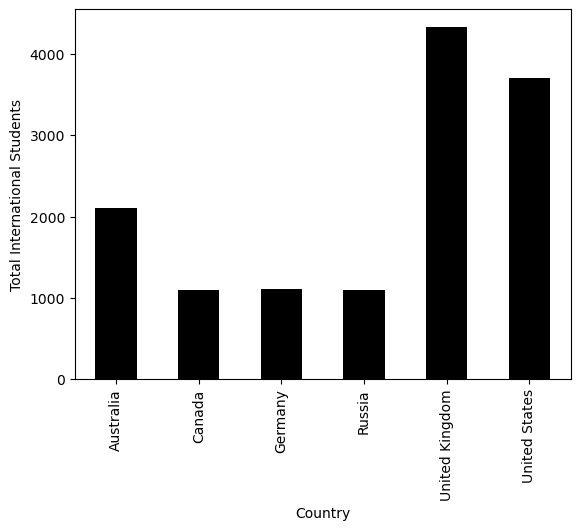

In [86]:
# plot the data from Question 9
# verify that this plot matches exactly with the image shown above

bar_plot(inter_students_by_country_more_than_1000, x='Country', y='Total International Students')


### Function 2: `scatter_plot`

Let us now create a general function for creating scatter plots.

In [90]:
# we have done this for you
# make sure you understand what this function is doing, reach out to a PM/TA if needed

def scatter_plot(df, x, y):
    """scatter_plot(df, x, y) takes in a DataFrame 'df' and displays 
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis"""
    ax = df.plot.scatter(x=x, y=y, color='black', legend=False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()


#### **Lab Question 10:** Use a **scatter plot** to plot the relationship between `Employer Reputation` and `Academic Reputation` in *2022*.

We will first compute the **DataFrame** with the required data. We will plot it later.

* Write a SQL query to **select** rows from the database where the `Year` is *2022*.
* Save the resulting **DataFrame** with **two** columns: `Employer Reputation` and `Academic Reputation`.

Points possible: 8.0

In [92]:
# first compute and store the DataFrame in variable table_2022, then display its head
# but do NOT plot just yet

table_2022 = pd.read_sql(
    "SELECT `Employer Reputation`, `Academic Reputation` "
    "FROM rankings WHERE `Year` = 2022",
    conn
)

table_2022.head()

,Employer Reputation,Academic Reputation
0,100.0,100.0
1,100.0,100.0
2,100.0,100.0
3,100.0,100.0
4,100.0,100.0


In [93]:
student_grader.check("lab-q10", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q10...
Great job! You passed all test cases for this question.


True

With the `scatter_plot` function defined, you are ready to create the required plot. Call `scatter_plot`, passing in `Employer Reputation` and `Academic Reputation` as the `x` and `y` arguments.

Your plot should look like this:

<div style="text-align: center;"><img src="images/scatter_plot.jpg" style="height: 400px;"/></div>

Make sure that the plot is labelled exactly as in the image here.

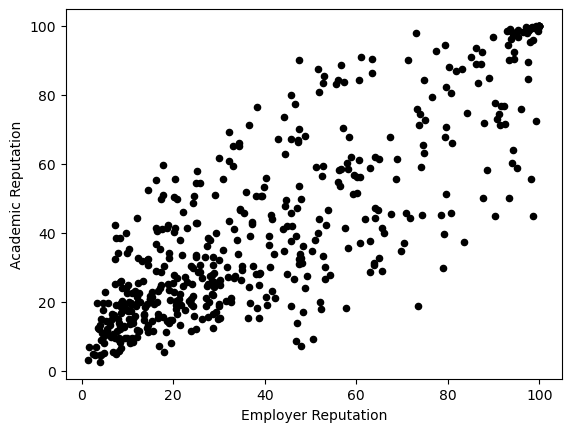

In [97]:
# create the scatter plot using table_2022
# verify that this plot matches exactly with the image shown above

scatter_plot(table_2022, x='Employer Reputation', y='Academic Reputation')


### Function 3: `horizontal_bar_plot`

Let us now create a general function for creating horizontal bar plots.

In [101]:
# we have done this one for you

def horizontal_bar_plot(df, y):
    """horizontal_bar_plot(df, y) takes in a DataFrame 'df' and displays 
    a horizontal bar plot with the column 'y' as the y-axis, and all
    other columns of 'df' on the x-axis"""
    df = df.set_index(y)
    ax = df.plot.barh()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))
    plt.show()

#### **Lab Question 11:** Make a **horizontal bar plot** of **average** `Employer Reputation` and **average** `Faculty Student` across all years.

We will first compute the **DataFrame** with the required data. We will plot it later.

* Write a SQL query to select `Year`, **average** `Employer Reputation`, and **average** `Faculty Student` grouped by `Year`.
* Save the resulting **DataFrame** with **three** columns: `Year`, the **average** of the `Employer Reputation` and the **average** of the `Faculty Student`.

Points possible: 8.0

In [119]:
table_2022_3_columns = pd.read_sql(
    "SELECT `Year`, AVG(`Employer Reputation`) AS 'AVG(`Employer Reputation`)', "
    "AVG(`Faculty Student`) AS 'AVG(`Faculty Student`)' "
    "FROM rankings GROUP BY `Year`",
    conn
)

table_2022_3_columns

,Year,AVG(`Employer Reputation`),AVG(`Faculty Student`)
0,2022,40.2770,49.1180
1,2023,39.6572,48.9296
2,2024,39.7314,41.0410


In [120]:
student_grader.check("lab-q11", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q11...
Great job! You passed all test cases for this question.


True

Now, use the `horizontal_bar_plot` function to create the required plot. Call `horizontal_bar_plot`, passing in `Year` as the `y` argument.

Your plot should look like this:

<div style="text-align: center;"><img src="images/horizontal_bar_plot.jpg" style="height: 400px;"/></div>

Make sure that the plot is labelled exactly as in the image here.

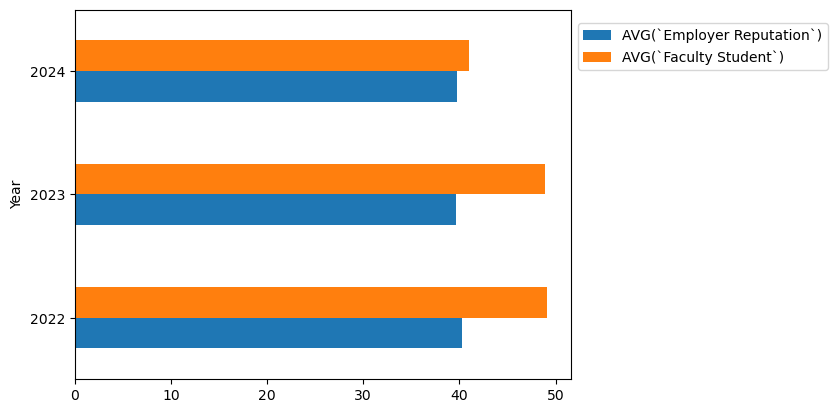

In [127]:
# create the horizontal bar plot using table_2022_3_columns
# verify that this plot matches exactly with the image shown above

horizontal_bar_plot(table_2022_3_columns, y='Year')


### Function 4: `pie_plot`

Let us now create a general function for creating pie plots.

In [131]:
# we have done this one for you

def pie_plot(df, x, y, title=None):
    """pie_plot(df, x, y, title) takes in a DataFrame 'df' and displays 
    a pie plot with the column 'x' as the x-axis, the (numeric) column
    'y' as the y-axis, and the 'title' as the title of the plot"""
    df = df.set_index(x)
    ax = df.plot.pie(y=y, legend=False)
    ax.set_ylabel(None)
    ax.set_title(title)
    plt.show()

#### **Lab Question 12**: Display a **pie chart** of the average overall score of the top 10 countries in descending order.

We will first compute the **DataFrame** with the required data. We will plot it later.

* Write a SQL query to select the **top** *10* countries based on **average** `Overall`.
* Save the resulting **DataFrame** with **two** columns: `Country`, and the **average** of the `Overall`.

**Hint:** If you are having trouble writing the SQL query, take a look at **Question 5**.

Select the average of the Overall column as `Average Score` since the grader is looking for this column.

Points possible: 8.0

In [136]:
# first compute and store the DataFrame in variable top10_overall_score, then display it
# but do NOT plot just yet

top10_overall_score = pd.read_sql(
    "SELECT `Country`, AVG(`Overall`) AS `Average Score` "
    "FROM rankings GROUP BY `Country` "
    "ORDER BY `Average Score` DESC LIMIT 10",
    conn
)

top10_overall_score

,Country,Average Score
0,Singapore,81.328571
1,Hong Kong SAR,69.883333
2,Switzerland,58.638462
3,United Kingdom,52.244056
4,United States,51.186905
5,Netherlands,50.956410
6,Sweden,49.875000
7,Mexico,49.842857
8,Australia,49.510390
9,Japan,49.445652


In [137]:
student_grader.check("lab-q12", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q12...
Great job! You passed all test cases for this question.


True

Now, use the `pie_plot` function to create the required plot.

* Call `pie_plot`, passing in `Country` as the `x` argument, and `Average Score` as the `y` argument.
* Your plot must also have the **title** `Countries with top 10 Overall` as in the image.

Your plot should look like this:

<div style="text-align: center;"><img src="images/pie_plot.jpg" style="height: 400px;"/></div>

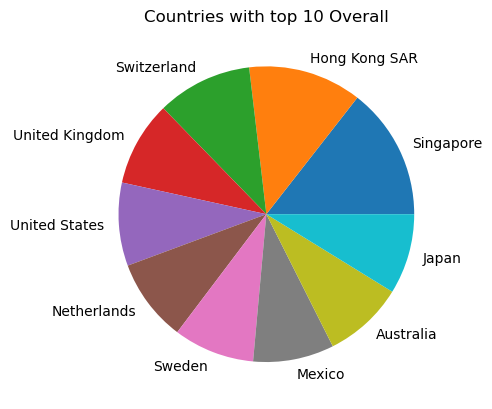

In [141]:
# create the pie plot using `top10_overall_score`
# verify that this plot matches exactly with the image shown above

pie_plot(top10_overall_score, x='Country', y='Average Score', title='Countries with top 10 Overall')


### Function 5: `get_regression_coeff`

Let us now create some general functions for creating regression line plots.

In [147]:
# we have defined this function for you

def get_regression_coeff(df, x, y):
    """get_regression_coeff(df, x, y) takes in a DataFrame 'df' and returns 
    the slope (m) and the y-intercept (b) of the line of best fit in the
    plot with the column 'x' as the x-axis, and the column 'y' as the y-axis"""
    df["1"] = 1
    res = np.linalg.lstsq(df[[x, "1"]], df[y], rcond=None)
    coefficients = res[0]
    m = coefficients[0]
    b = coefficients[1]
    return (m, b)

### Function 6: `get_regression_line`

Points possible: 4.0

In [151]:
# you must define this function to compute the best fit line

def get_regression_line(df, x, y):
    """get_regression_line(df, x, y) takes in a DataFrame 'df' and returns 
    a DataFrame with an additional column "fit" of the line of best fit in the
    plot with the column 'x' as the x-axis, and the column 'y' as the y-axis"""
    
    m, b = get_regression_coeff(df, x, y)
    
    df['fit'] = m * df[x] + b
    
    return df

In [152]:
student_grader.check("lab-get_regression_line", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-get_regression_line...
Great job! You passed all test cases for this question.


True

### Function 7: `regression_line_plot`

In [155]:
# this function plots the best fit line on the scatter plot
# we have defined this for you

def regression_line_plot(df, x, y):
    """regression_line_plot(df, x, y) takes in a DataFrame 'df' and displays
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis, as well as the best fit line for the plot"""
    # use 'get_regression_line' to get the data for the best fit line.
    df = get_regression_line(df, x, y)
    # use df.plot.scatter (not scatter_plot) to plot the x and y columns
    # of 'df' in black color.
    # save the return value of df.plot.scatter to a variable called 'ax'
    ax = df.plot.scatter(x=x, y=y, color='black')
    # use df.plot.line to plot the fitted line in red,
    # using ax=ax as a keyword argument.
    # this ensures that both the scatter plot and line end up on the same plot
    # play careful attention to what the 'x' and 'y' arguments ought to be
    df.plot.line(x=x, y='fit', c='red', ax=ax)
    plt.show()

Now, call `regression_line_plot` on your data from **Question 10** to show the correlation between `Employer Reputation` and `Academic Reputation`.

Your line of best fit should look like this:

<div style="text-align: center;"><img src="images/regression_line_plot.jpg" style="height: 400px;"/></div>
    
Make sure that the plot is labelled exactly as in the image here.

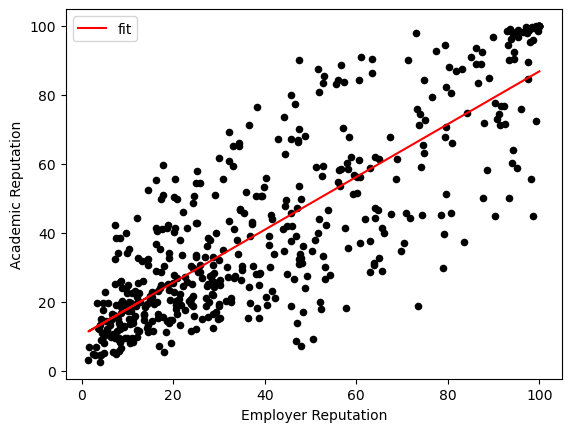

In [158]:
# create the scatter plot with the best fit line using `table_2022` from Question 10
# verify that this plot matches exactly with the image shown above

regression_line_plot(table_2022, x='Employer Reputation', y='Academic Reputation')


### Section 4: Closing the connection

Now that you are done with your database, it is very important to close it.

In [160]:
# close your connection here

# we have done this one for you
conn.close()

### Submitting the lab

Submit your `p13.ipynb` on Gradescope to the lab-p13 assignment, like usual. Remember that the grades for the lab portion of the project and the actual assignment grade are independent. You will submit the same notebook (at different levels of completion) to two different assignments.

## Project Portion (19 questions)

### Project Requirements:

You **may not** hardcode indices in your code. You **may not** manually download **any** files for this project, unless you are **explicitly** told to do so. For all other files, you **must** use the `download` function to download the files.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because the autograder grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

#### Required Functions:
- `download`
- `bar_plot`
- `scatter_plot`
- `horizontal_bar_plot`
- `pie_plot`
- `get_regression_coeff`
- `get_regression_line`
- `regression_line_plot`

In this project, you will also be required to define certain **data structures**.

#### Required Data Structures:
- `conn`

You **must** write SQL queries to solve the questions in this project, unless you are **explicitly** told otherwise. You will **not get any credit** if you use `pandas` operations to extract data. We will give you **specific** instructions for any questions where `pandas` operations are allowed. In addition, you are also **required** to follow the requirements below:

* You **must** close the connection to `conn` at the end of your notebook.
* Do **not** use **absolute** paths such as `C:\\mdoescher\cs220\p13`. You may **only** use **relative paths**.
* Do **not** hardcode `/` or `\\` in any of your paths. You **must** use `os.path.join` to create paths.
* Do **not** leave irrelevant output or test code that we didn't ask for.
* **Avoid** calling **slow** functions multiple times within a loop.
* Do **not** define multiple functions with the same name or define multiple versions of one function with different names. Just keep the best version.

### Data Structure 1: `conn`

You **must** now create a **database** called `rankings.db` out of `rankings.json`, connect to it, and save it in a variable called `conn`. You **must** use this connection to the database `rankings.db` to answer the questions that follow.

In [163]:
# we have done this for you
# this is the same process as in the lab
download("https://cs220.cs.wisc.edu/projects/data/rankings2.json", "rankings.json")
rankings = pd.read_json("rankings.json")
conn = sqlite3.connect('rankings.db')
rankings.to_sql("rankings", conn, if_exists="replace", index=False)

1500

In [165]:
# run this cell and confirm that you have defined the variables correctly
pd.read_sql("SELECT * FROM rankings LIMIT 5", conn)

,Year,Rank,Institution Name,Country,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Overall
0,2022,1,Massachusetts Institute of Technology (MIT),United States,100.0,100.0,100.0,100.0,100.0,91.4,None,None,None,100.0
1,2022,2,University of Oxford,United Kingdom,100.0,100.0,100.0,96.0,99.5,98.5,None,None,None,99.5
2,2022,3,Stanford University,United States,100.0,100.0,100.0,99.9,99.8,67.0,None,None,None,98.7
3,2022,3,University of Cambridge,United Kingdom,100.0,100.0,100.0,92.1,100.0,97.7,None,None,None,98.7
4,2022,5,Harvard University,United States,100.0,100.0,99.1,100.0,84.2,70.1,None,None,None,98.0


#### **Question 1:** List **all** the statistics of the institution with the `Institution Name` *University of Wisconsin-Madison*. 

You **must** display **all** the columns. The rows **must** be in *ascending* order of `Year`.

Your output **must** be a **DataFrame** that looks like this:

||**Year**|**Rank**|**Institution Name**|**Country**|**Academic Reputation**|**Employer Reputation**|**Faculty Student**|**Citations per Faculty**|**International Faculty**|**International Students**|**International Research Network**|**Employment Outcomes**|**Sustainability**|**Overall**|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|**0**|2022|75|University of Wisconsin-Madison|United States|83.4|52.8|69.2|58.4|8.1|27.5|nan|nan|nan|66.2|
|**1**|2023|83|University of Wisconsin-Madison|United States|82.4|48.1|70.6|41.9|37.7|23.8|93.2|84.6|nan|63.7|
|**2**|2024|102|University of Wisconsin-Madison|United States|80.2|47.8|61.3|37.4|30.9|22.8|83.6|73.1|83.7|60.0|

Points possible: 5.0

In [167]:
# compute and store the answer in the variable 'uw_stats', then display it

uw_stats = pd.read_sql(
    "SELECT * FROM rankings WHERE `Institution Name` = 'University of Wisconsin-Madison' "
    "ORDER BY `Year` ASC",
    conn
)

uw_stats

,Year,Rank,Institution Name,Country,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Overall
0,2022,75,University of Wisconsin-Madison,United States,83.4,52.8,69.2,58.4,8.1,27.5,NaN,NaN,NaN,66.2
1,2023,83,University of Wisconsin-Madison,United States,82.4,48.1,70.6,41.9,37.7,23.8,93.2,84.6,NaN,63.7
2,2024,102,University of Wisconsin-Madison,United States,80.2,47.8,61.3,37.4,30.9,22.8,83.6,73.1,83.7,60.0


In [168]:
student_grader.check("q1", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q1...
Great job! You passed all test cases for this question.


True

#### **Question 2:** What are the **top** *10* institutions in *Japan* which had the **highest** score of `International Students` in the `Year` *2024*?

You **must** display the columns `Institution Name` and `International Students`. The rows **must** be in *descending* order of `International Students`.

Your output **must** be a **DataFrame** that looks like this:

||**Institution Name**|**International Students**|
|---|---|---|
|**0**|Tokyo Institute of Technology (Tokyo Tech)|31.7|
|**1**|The University of Tokyo|29.2|
|**2**|Waseda University|28.6|
|**3**|Kyushu University|25.6|
|**4**|Hitotsubashi University|22.4|
|**5**|University of Tsukuba|21.2|
|**6**|Kyoto University|20.8|
|**7**|Nagoya University|19.1|
|**8**|Hokkaido University|14.4|
|**9**|Tohoku University|13.8|

Points possible: 5.0

In [171]:
# compute and store the answer in the variable 'japan_top_10_inter', then display it

japan_top_10_inter = pd.read_sql(
    "SELECT `Institution Name`, `International Students` "
    "FROM rankings WHERE `Country` = 'Japan' AND `Year` = 2024 "
    "ORDER BY `International Students` DESC LIMIT 10",
    conn
)
japan_top_10_inter

,Institution Name,International Students
0,Tokyo Institute of Technology (Tokyo Tech),31.7
1,The University of Tokyo,29.2
2,Waseda University,28.6
3,Kyushu University,25.6
4,Hitotsubashi University,22.4
5,University of Tsukuba,21.2
6,Kyoto University,20.8
7,Nagoya University,19.1
8,Hokkaido University,14.4
9,Tohoku University,13.8


In [172]:
student_grader.check("q2", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q2...
Great job! You passed all test cases for this question.


True

#### **Question 3:** What are the **top** *10* institutions in the *United States* which had the **highest** *reputation* in the `Year` *2023*?

The `Reputation` of an institution is defined as the sum of `Academic Reputation` and `Employer Reputation`. You **must** display the columns `Institution Name` and `Reputation`. The rows **must** be in *descending* order of `Reputation`. In case the `Reputation` is tied, the rows must be in *alphabetical* order of `Institution Name`.

Your output **must** be a **DataFrame** that looks like this:

||**Institution Name**|**Reputation**|
|---|---|---|
|**0**|Harvard University|200.0|
|**1**|Massachusetts Institute of Technology (MIT) |200.0|
|**2**|Stanford University|200.0|
|**3**|University of California, Berkeley (UCB)|200.0|
|**4**|University of California, Los Angeles (UCLA)|199.9|
|**5**|Yale University|199.9|
|**6**|Princeton University|198.8|
|**7**|Columbia University|197.8|
|**8**|New York University (NYU)|194.9|
|**9**|University of Chicago|191.4|

**Hint:** You can use mathematical expressions in your **SELECT** clause. For example, if you wish to add the `Academic Reputation` and `Employer Reputation` for each institution, you could use the following query:

```sql
SELECT (`Academic Reputation` + `Employer Reputation`) FROM rankings
```

Points possible: 5.0

In [175]:
# compute and store the answer in the variable 'us_top_10_rep', then display it

us_top_10_rep = pd.read_sql(
    "SELECT `Institution Name`, "
    "(`Academic Reputation` + `Employer Reputation`) AS `Reputation` "
    "FROM rankings WHERE `Country` = 'United States' AND `Year` = 2023 "
    "ORDER BY `Reputation` DESC, `Institution Name` ASC LIMIT 10",
    conn
)

us_top_10_rep

,Institution Name,Reputation
0,Harvard University,200.0
1,Massachusetts Institute of Technology (MIT),200.0
2,Stanford University,200.0
3,"University of California, Berkeley (UCB)",200.0
4,"University of California, Los Angeles (UCLA)",199.9
5,Yale University,199.9
6,Princeton University,198.8
7,Columbia University,197.8
8,New York University (NYU),194.9
9,University of Chicago,191.4


In [176]:
student_grader.check("q3", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q3...
Great job! You passed all test cases for this question.


True

#### **Question 4:** What are the **top** *10* countries which had the **most** *institutions* listed in the `Year` *2022*?

You **must** display the columns `Country` and `Number of Institutions`. The `Number of Institutions` of a country is defined as the number of institutions from that country. The rows **must** be in *descending* order of `Number of Institutions`. In case the `Number of Institutions` is tied, the rows must be in *alphabetical* order of `Country`.

**Hint:** You **must** use the `COUNT` SQL function to answer this question.

Your output **must** be a **DataFrame** that looks like this:

||**Country**|**Number of Institutions**|
|---|---|---|
|**0**|United States|87|
|**1**|United Kingdom|49|
|**2**|Germany|31|
|**3**|Australia|26|
|**4**|China (Mainland)|26|
|**5**|Russia|17|
|**6**|Canada|16|
|**7**|Japan|16|
|**8**|South Korea|16|
|**9**|Italy|14|

Points possible: 5.0

In [180]:
# compute and store the answer in the variable 'top_10_countries', then display it

top_10_countries = pd.read_sql(
    "SELECT `Country`, COUNT(*) AS `Number of Institutions` "
    "FROM rankings WHERE `Year` = 2022 "
    "GROUP BY `Country` "
    "ORDER BY `Number of Institutions` DESC, `Country` ASC LIMIT 10",
    conn
)

top_10_countries

,Country,Number of Institutions
0,United States,87
1,United Kingdom,49
2,Germany,31
3,Australia,26
4,China (Mainland),26
5,Russia,17
6,Canada,16
7,Japan,16
8,South Korea,16
9,Italy,14


In [181]:
student_grader.check("q4", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q4...
Great job! You passed all test cases for this question.


True

#### **Question 5:** Create a **bar plot** using the data from Question 4 with the `Country` on the **x-axis** and the `Number of Institutions` on the **y-axis**.

In addition to the top ten countries, you **must** also aggregate the data for **all** the **other** countries, and represent that number in the **row** `Other`. You are **allowed** to do this using any combination of  SQL queries and pandas operations.

You **must** first compute a **DataFrame** `num_institutions` containing the **Country**, and the **Number of Institutions** data.

Your output **must** be a **DataFrame** that looks like this:

||**Country**|**Number of Institutions**|
|---|---|---|
|**0**|United States|87|
|**1**|United Kingdom|49|
|**2**|Germany|31|
|**3**|Australia|26|
|**4**|China (Mainland)|26|
|**5**|Russia|17|
|**6**|Canada|16|
|**7**|Japan|16|
|**8**|South Korea|16|
|**9**|Italy|14|
|**10**|Other|202|

**Hint**: You can use the `concat` method of a DataFrame to add two DataFrames together. For example:

```python
my_new_dataframe = pd.concat([my_dataframe, new_dataframe])
```
will create a *new* **DataFrame** `my_new_dataframe` which contains all the rows from `my_dataframe` and `new_dataframe`. In order to use this method, you will first have to create a **new** DataFrame with the **same** columns as `top_10_countries`, but with only **one row** of data. The `Country` **must** be `Other`, and the `Number of Institutions` **must** be the aggregate sum of institutions from all other countries. You **must** then *concatenate* this DataFrame with `top_10_countries`.

Points possible: 5.0

In [192]:
# Query to get the number of institutions for all countries in 2022
all_countries = pd.read_sql(
    "SELECT `Country`, COUNT(*) AS `Number of Institutions` "
    "FROM rankings WHERE `Year` = 2022 "
    "GROUP BY `Country` "
    "ORDER BY `Number of Institutions` DESC, `Country` ASC",
    conn
)
other_institutions_sum = all_countries.iloc[10:]["Number of Institutions"].sum()

other_row = pd.DataFrame([{"Country": "Other", "Number of Institutions": other_institutions_sum}])

num_institutions = pd.concat([all_countries.iloc[:10], other_row], ignore_index=True)

num_institutions

,Country,Number of Institutions
0,United States,87
1,United Kingdom,49
2,Germany,31
3,Australia,26
4,China (Mainland),26
5,Russia,17
6,Canada,16
7,Japan,16
8,South Korea,16
9,Italy,14


In [193]:
student_grader.check("q5", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q5...
Great job! You passed all test cases for this question.


True

Now, **plot** `num_institutions` as **bar plot** with the **x-axis** labelled *Country* and the **y-axis** labelled *Number of Institutions*.

You **must** use the `bar_plot` function to create the plot. Your plot should look like this:

<div style="text-align: center;"><img src="images/q5.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

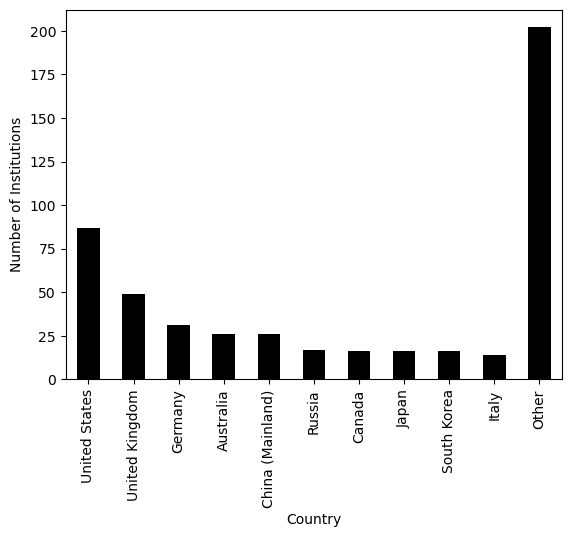

In [196]:
# create the bar plot using the DataFrame 'num_institutions' with the x-axis labelled "Country" 
# and the y-axis labelled "Number of Institutions"

bar_plot(num_institutions, x='Country', y='Number of Institutions')

#### **Question 6:** Create a **bar plot** of the **top** *10* countries with the **highest** *total* `Overall` listed in the `year` *2022*.

The `Total Score` of a `Country` is defined as the **sum** of `Overall` of **all** institutions in that `Country`. You **must** display the columns `Country` and `Total Score`. The rows **must** be in *descending* order of `Total Score`.

You **must** first compute a **DataFrame** `top_10_total_score` containing the **Country**, and the **Total Score** data.

Your **DataFrame** should looks like this:

||**Country**|**Total Score**|
|---|---|---|
|**0**|United States|4441.9|
|**1**|United Kingdom|2543.8|
|**2**|Australia|1243.3|
|**3**|Germany|1235.3|
|**4**|China (Mainland)|1138.5|
|**5**|Japan|796.3|
|**6**|Canada|785.6|
|**7**|South Korea|739.1|
|**8**|Netherlands|673.6|
|**9**|Russia|582.6|

Points possible: 5.0

In [199]:
top_10_total_score = pd.read_sql(
    "SELECT `Country`, SUM(`Overall`) AS `Total Score` "
    "FROM rankings WHERE `Year` = 2022 "
    "GROUP BY `Country` "
    "ORDER BY `Total Score` DESC LIMIT 10",
    conn
)

top_10_total_score

,Country,Total Score
0,United States,4441.9
1,United Kingdom,2543.8
2,Australia,1243.3
3,Germany,1235.3
4,China (Mainland),1138.5
5,Japan,796.3
6,Canada,785.6
7,South Korea,739.1
8,Netherlands,673.6
9,Russia,582.6


In [200]:
student_grader.check("q6", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q6...
Great job! You passed all test cases for this question.


True

Now, **plot** `top_10_total_score` as **bar plot** with the **x-axis** labelled *Country* and the **y-axis** labelled *Total Score*.

You **must** use the `bar_plot` function to create the plot. Your plot should look like this:

<div style="text-align: center;"><img src="images/q6.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

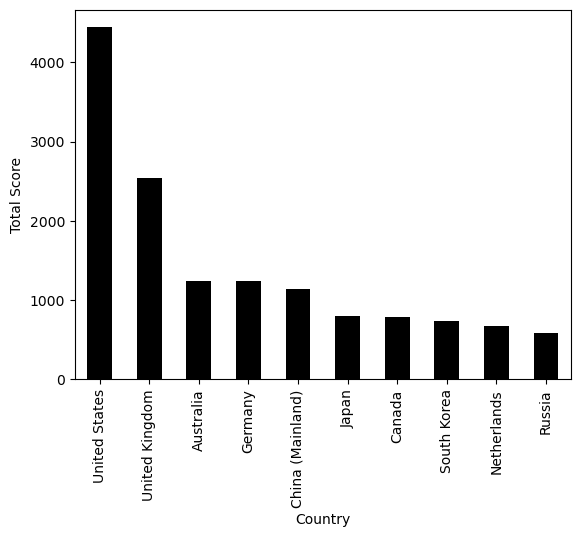

In [203]:
# create the bar plot using the DataFrame 'top_10_total_score' with the x-axis labelled "Country" 
# and the y-axis labelled "Total Score"

bar_plot(top_10_total_score, x='Country', y='Total Score')

#### **Question 7:** What are the **top** *10* institutions in the *United States* which had the **highest** *International Score* in the `Year` *2024*?

The *International Score* of an institution is defined as the **sum** of `International Faculty` and `International Students` scores of that institution. You **must** display the columns `Institution Name` and `International Score`. The rows **must** be in *descending* order of `International Score`.

Your output **must** be a **DataFrame** that looks like this:

||**Institution Name**|**International Score**|
|---|---|---|
|**0**|Massachusetts Institute of Technology (MIT) |188.2|
|**1**|Rice University|185.8|
|**2**|California Institute of Technology (Caltech)|181.0|
|**3**|Yale University|168.6|
|**4**|University of Pennsylvania|166.3|
|**5**|University of Chicago|165.6|
|**6**|University of Rochester|163.1|
|**7**|University of California, Berkeley (UCB)|156.1|
|**8**|Johns Hopkins University|155.8|
|**9**|Northeastern University|154.5|

Points possible: 5.0

In [206]:
# compute and store the answer in the variable 'top_10_inter_score', then display it

top_10_inter_score = pd.read_sql(
    "SELECT `Institution Name`, "
    "(`International Faculty` + `International Students`) AS `International Score` "
    "FROM rankings WHERE `Country` = 'United States' AND `Year` = 2024 "
    "ORDER BY `International Score` DESC LIMIT 10",
    conn
)
top_10_inter_score

,Institution Name,International Score
0,Massachusetts Institute of Technology (MIT),188.2
1,Rice University,185.8
2,California Institute of Technology (Caltech),181.0
3,Yale University,168.6
4,University of Pennsylvania,166.3
5,University of Chicago,165.6
6,University of Rochester,163.1
7,"University of California, Berkeley (UCB)",156.1
8,Johns Hopkins University,155.8
9,Northeastern University,154.5


In [207]:
student_grader.check("q7", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q7...
Great job! You passed all test cases for this question.


True

#### **Question 8:** Create a **scatter plot** representing the `Citations per Faculty` (on the **x-axis**) against the `Overall` (on the **y-axis**) of each institution in the `Year` *2024*.

You **must** first compute a **DataFrame** `citations_overall` containing the **Citations per Faculty**, and the **Overall** data from the `Year` *2024*, of each **institution**.

Points possible: 5.0

In [210]:
# first compute and store the DataFrame 'citations_overall', then display its head
# do NOT plot just yet

citations_overall = pd.read_sql(
    "SELECT `Citations per Faculty`, `Overall` "
    "FROM rankings WHERE `Year` = 2024",
    conn
)
citations_overall.head()

,Citations per Faculty,Overall
0,100.0,100.0
1,92.3,99.2
2,90.6,98.9
3,100.0,98.3
4,99.9,98.1


In [212]:
student_grader.check("q8", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q8...
Great job! You passed all test cases for this question.


True

Now, **plot** `citations_overall` as **scatter plot** with the **x-axis** labelled *Citations per Faculty* and the **y-axis** labelled *Overall*.

You **must** use the `scatter_plot` function to create the plot. Your plot should look like this:

<div style="text-align: center;"><img src="images/q8.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

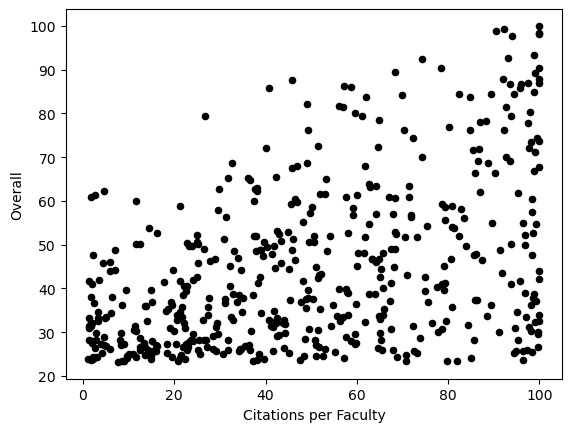

In [214]:
# create the scatter plot using the DataFrame 'citations_overall' with the x-axis labelled "Citations per Faculty" 
# and the y-axis labelled "Overall"

scatter_plot(citations_overall, x='Citations per Faculty', y='Overall')

#### **Question 9:** Create a **scatter plot** representing the `Academic Reputation` (on the **x-axis**) against the `Employer Reputation` (on the **y-axis**) of each institution from the *United States* in the `Year` *2023*.

You **must** first compute a **DataFrame** `reputations_usa` containing the **Academic Reputation**, and the **Employer Reputation** data from the `Year` *2023*, of each **institution** in the `Country` *United States*.

Points possible: 5.0

In [217]:
# first compute and store the DataFrame 'reputations_usa', then display its head
# do NOT plot just yet

reputations_usa = pd.read_sql(
    "SELECT `Academic Reputation`, `Employer Reputation` "
    "FROM rankings WHERE `Country` = 'United States' AND `Year` = 2023",
    conn
)

reputations_usa.head()

,Academic Reputation,Employer Reputation
0,100.0,100.0
1,100.0,100.0
2,100.0,100.0
3,96.5,87.1
4,99.2,92.2


In [218]:
student_grader.check("q9", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q9...
Great job! You passed all test cases for this question.


True

Now, **plot** `reputations_usa` as **scatter plot** with the **x-axis** labelled *Academic Reputation* and the **y-axis** labelled *Employer Reputation*.

You **must** use the `scatter_plot` function to create the plot. Your plot should look like this:

<div style="text-align: center;"><img src="images/q9.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

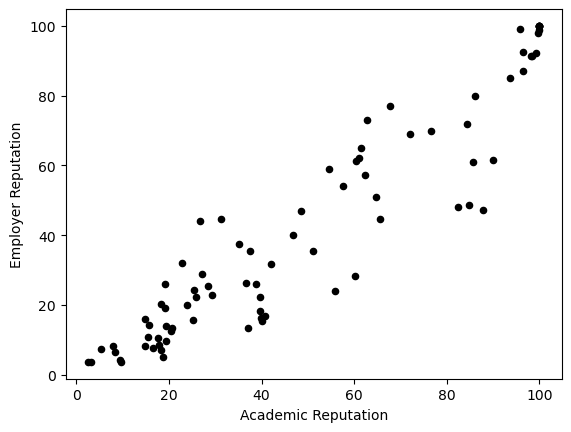

In [221]:
# create the scatter plot using the DataFrame 'reputations_usa' with the x-axis labelled "Academic Reputation" 
# and the y-axis labelled "Employer Reputation"

scatter_plot(reputations_usa, x='Academic Reputation', y='Employer Reputation')

#### **Question 10:** Create a **scatter plot** representing the `International Students` (on the **x-axis**) against the `Faculty Student` (on the **y-axis**) for the **top ranked** institution of **each** `Country` in the `Year` *2023*.

You **must** first compute a **DataFrame** `top_ranked_inter_faculty` containing the **International Students**, and the **Faculty Student** data from the `Year` *2023*, of the **top** ranked **institution** (i.e., the institution with the **least** `rank`) of each **country**.

**Hint:** You can use the `MIN` SQL function to return the least value of a selected column. However, there are a few things to keep in mind while using this function.
* The function must be in **uppercase** (i.e., you must use `MIN`, and **not** `min`).
* The column you are finding the minimum of must be inside backticks (``` ` ```). For example, if you want to find the minimum `Rank`, you need to say ```MIN(`Rank`)```.

If you do not follow the syntax above, your code will likely fail.

Your DataFrame should look like this:

<div style="text-align: center;"><img src="images/q10.png" style="height: 200px;"/></div>

Points possible: 5.0

In [265]:
# first compute and store the DataFrame 'top_ranked_inter_faculty', then display its head
# do NOT plot just yet

top_ranked_inter_faculty = pd.read_sql(
    """
    SELECT r.`Country`, r.`Faculty Student`, r.`International Students`, sub.`MinRank`
    FROM rankings r
    INNER JOIN (
        SELECT `Country`, MIN(`Rank`) AS `MinRank`
        FROM rankings
        WHERE `Year` = 2023
        GROUP BY `Country`
    ) sub
    ON r.`Country` = sub.`Country` AND r.`Rank` = sub.`MinRank`
    WHERE r.`Year` = 2023
    ORDER BY r.`Country` ASC
    """,
    conn
)

top_ranked_inter_faculty.rename(columns={"MinRank": "MIN(`Rank`)"}, inplace=True)

top_ranked_inter_faculty.head()

,Country,Faculty Student,International Students,MIN(`Rank`)
0,Argentina,76.0,68.9,67
1,Australia,38.0,96.0,30
2,Austria,24.2,89.2,151
3,Belarus,96.8,48.2,288
4,Belgium,7.7,43.3,76


In [266]:
student_grader.check("q10", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q10...
Great job! You passed all test cases for this question.


True

Now, **plot** `top_ranked_inter_faculty` as **scatter plot** with the **x-axis** labelled *International Students* and the **y-axis** labelled *Faculty Student*.

You **must** use the `scatter_plot` function to create the plot. Your plot should look like this:

<div style="text-align: center;"><img src="images/q10.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

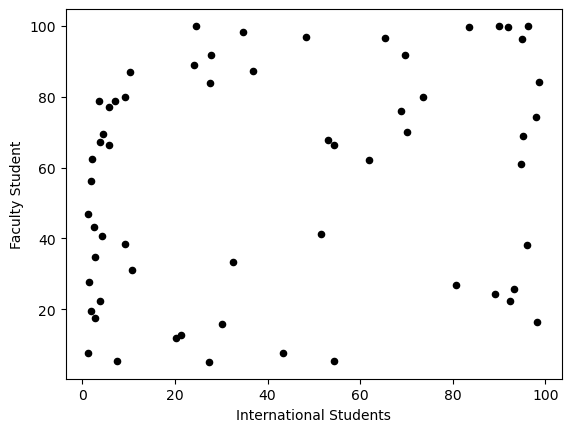

In [278]:
# create the scatter plot using the DataFrame 'top_ranked_inter_faculty' with the x-axis labelled "International Students" 
# and the y-axis labelled "Faculty Student"

scatter_plot(top_ranked_inter_faculty, x="International Students", y="Faculty Student")

### Correlations:

You can use the `.corr()` method on a **DataFrame** that has **two** columns to get the *correlation* between those two columns.

For example, if we have a **DataFrame** `df` with the two columns `Citations per Faculty` and `Overall`, `df.corr()` would return

||**Citations per Faculty**|**Overall**|
|---------|------|---------|
|Citations per Faculty|1.000000|0.617044|
|Overall|0.617044|1.000000|

You can use `.loc` here to **extract** the *correlation* between the two columns (`0.617044` in this case).

#### **Question 11:** Find the **correlation** between `International Students` and `Overall` for institutions from the `Country` *United Kingdom* with a `Rank` less than or equal to *100* in the `Year` *2022*.

Your output **must** be a **float** representing the absolute correlation. The **only** `pandas` operations you are **allowed** to use are: `.corr`, `.loc` and `.iloc`. You **must** use SQL to gather all other data.

Points possible: 5.0

In [287]:
# compute and store the answer in the variable 'uk_inter_score_corr', then display it

uk_inter_score_data = pd.read_sql(
    """
    SELECT `International Students`, `Overall`
    FROM rankings
    WHERE `Country` = 'United Kingdom' AND `Year` = 2022 AND `Rank` <= 100
    """,
    conn
)

correlation_matrix = uk_inter_score_data.corr()

uk_inter_score_corr = abs(correlation_matrix.loc['International Students', 'Overall'])

uk_inter_score_corr

0.4534457221342218

In [288]:
student_grader.check("q11", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q11...
Great job! You passed all test cases for this question.


True

#### **Question 12:** Find the **correlation** between `Citations per International` and `Overall` for **all** institutions in the `Year` *2024*.

Your output **must** be a **float** representing the absolute correlation. The **only** `pandas` operations you are **allowed** to use are: `.corr`, `.loc` and `.iloc`. You **must** use SQL to gather all other data.

This should be computed as `(Citations per Faculty` * `International Faculty) / 100`, and you should select it as `Citations per International`.

Points possible: 5.0

In [293]:
# compute and store the answer in the variable 'cit_per_inter_score_corr', then display it

cit_per_inter_data = pd.read_sql(
    """
    SELECT 
        (`Citations per Faculty` * `International Faculty`) / 100 AS `Citations per International`,
        `Overall`
    FROM rankings
    WHERE `Year` = 2024
    """,
    conn
)

correlation_matrix = cit_per_inter_data.corr()

cit_per_inter_score_corr = abs(correlation_matrix.loc['Citations per International', 'Overall'])

cit_per_inter_score_corr

0.5943163420092246

In [294]:
student_grader.check("q12", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q12...
Great job! You passed all test cases for this question.


True

#### **Question 13:** What are the **top** *15* countries with the **highest** *total* of `Citations per International` in the `Year` *2024*.

The *total* `Citations per International` of a `Country` is defined as the **sum** of `Citations per International` scores of **all** institutions in that `Country`. You **must** display the columns `Country` and `Sum of International Citations`. The rows **must** be in *descending* order of `Sum of International Citations`.

Your output **must** be a **DataFrame** that looks like this:

||**Country**|**Sum of International Citations**|
|---|---|---|
|**0**|United States|2294.2671|
|**1**|United Kingdom|2279.9530|
|**2**|Australia|1895.6595|
|**3**|Canada|822.9573|
|**4**|Netherlands|749.9450|
|**5**|Switzerland|664.2349|
|**6**|Germany|635.0223|
|**7**|China (Mainland)|578.7473|
|**8**|Hong Kong SAR|513.1582|
|**9**|France|385.9691|
|**10**|Sweden|382.8463|
|**11**|New Zealand|344.3393|
|**12**|Belgium|300.6716|
|**13**|Denmark|217.8851|
|**14**|Finland|210.7134|

Points possible: 5.0

In [297]:
# compute and store the answer in the variable 'top_cit_per_inter', then display it

top_cit_per_inter = pd.read_sql(
    """
    SELECT `Country`, SUM((`Citations per Faculty` * `International Faculty`) / 100) AS `Sum of International Citations`
    FROM rankings
    WHERE `Year` = 2024
    GROUP BY `Country`
    ORDER BY `Sum of International Citations` DESC
    LIMIT 15
    """,
    conn
)
top_cit_per_inter

,Country,Sum of International Citations
0,United States,2294.2671
1,United Kingdom,2279.9530
2,Australia,1895.6595
3,Canada,822.9573
4,Netherlands,749.9450
5,Switzerland,664.2349
6,Germany,635.0223
7,China (Mainland),578.7473
8,Hong Kong SAR,513.1582
9,France,385.9691


In [299]:
student_grader.check("q13", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q13...
Great job! You passed all test cases for this question.


True

#### **Question 14:** Among the institutions ranked within the **top** *300*  in the `Year` *2023*, find the **average** `Citations per International` for **each** `Country`.

You **must** display the columns `Country` and `Average Citations per International` representing the **average** of `Citations per International` for **each** `Country`. The rows **must** be in *descending* order of `Average Citations per International`. You **must** **omit** rows where `Citations per International` and `International Faculty` columns are **missing** by using the clause:

```sql
WHERE (`Citations per Faculty` IS NOT NULL AND `International Faculty` IS NOT NULL)
```


**Hint:** To find the **average**, you can use `SUM()` and `COUNT()` or you can simply use `AVG()`.

Your output **must** be a **DataFrame** whose **first ten rows** look like this:

||**Country**|**Average Citations per International**|
|---|---|---|
|**0**|Singapore|92.950000|
|**1**|Australia|82.001726|
|**2**|Hong Kong SAR|78.318000|
|**3**|Switzerland|78.004875|
|**4**|Netherlands|58.039117|
|**5**|United Kingdom|56.838479|
|**6**|Sweden|52.991567|
|**7**|Canada|48.342191|
|**8**|Denmark|47.686267|
|**9**|Belgium|47.580433|

Points possible: 5.0

In [301]:
# compute and store the answer in the variable 'avg_cit_per_inter', then display it

avg_cit_per_inter = pd.read_sql(
    """
    SELECT `Country`, 
           AVG((`Citations per Faculty` * `International Faculty`) / 100) AS `Average Citations per International`
    FROM rankings
    WHERE `Year` = 2023 AND `Rank` <= 300 AND 
          (`Citations per Faculty` IS NOT NULL AND `International Faculty` IS NOT NULL)
    GROUP BY `Country`
    ORDER BY `Average Citations per International` DESC
    """,
    conn
)

avg_cit_per_inter

,Country,Average Citations per International
0,Singapore,92.950000
1,Australia,82.001726
2,Hong Kong SAR,78.318000
3,Switzerland,78.004875
4,Netherlands,58.039117
5,United Kingdom,56.838479
6,Sweden,52.991567
7,Canada,48.342191
8,Denmark,47.686267
9,Belgium,47.580433


In [302]:
student_grader.check("q14", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q14...
Great job! You passed all test cases for this question.


True

#### **Question 15** Find the **institution** with the **highest** value of `Citations per International` for **each** `Country` in the `Year` *2024*.

Your output **must** be a **DataFrame** with the columns `Country`, `Institution Name`, and a new column `Maximum Citations per International` representing the **maximum** value of `Citations per International` for that country. The rows **must** be in *descending* order of `Maximum Citations per International`. You **must** **omit** rows where `Maximum Citations per International` is **missing** by using the clause:

```sql
HAVING `Maximum Citations per International` IS NOT NULL
```

**Hint:** You can use the `MAX()` function to return the largest value within a group.

Your output **must** be a **DataFrame** whose **first ten rows** look like this:

||**Country**|**Institution Name**|**Maximum Citations per International**|
|---|---|---|---|
|**0**|United States|Massachusetts Institute of Technology (MIT) |100.0000|
|**1**|Hong Kong SAR|City University of Hong Kong|99.9000|
|**2**|Switzerland|University of Bern|99.2000|
|**3**|Australia|The University of Western Australia|98.9000|
|**4**|Canada|Western University|98.0051|
|**5**|Macau SAR|University of Macau|96.9000|
|**6**|China (Mainland)|Zhejiang University|95.3552|
|**7**|Singapore|Nanyang Technological University, Singapore (NTU)|94.4000|
|**8**|United Kingdom|Imperial College London|94.0000|
|**9**|France|Institut Polytechnique de Paris|92.3930|

Points possible: 6.0

In [305]:
# compute and store the answer in the variable 'max_cit_per_inter', then display it
max_cit_per_inter = pd.read_sql(
    """
    SELECT 
        `Country`, 
        `Institution Name`, 
        MAX((`Citations per Faculty` * `International Faculty`) / 100) AS `Maximum Citations per International`
    FROM rankings
    WHERE `Year` = 2024
    GROUP BY `Country`
    HAVING `Maximum Citations per International` IS NOT NULL
    ORDER BY `Maximum Citations per International` DESC
    """,
    conn
)

max_cit_per_inter

,Country,Institution Name,Maximum Citations per International
0,United States,Massachusetts Institute of Technology (MIT),100.0000
1,Hong Kong SAR,City University of Hong Kong,99.9000
2,Switzerland,University of Bern,99.2000
3,Australia,The University of Western Australia,98.9000
4,Canada,Western University,98.0051
5,Macau SAR,University of Macau,96.9000
6,China (Mainland),Zhejiang University,95.3552
7,Singapore,"Nanyang Technological University, Singapore (NTU)",94.4000
8,United Kingdom,Imperial College London,94.0000
9,France,Institut Polytechnique de Paris,92.3930


In [306]:
student_grader.check("q15", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q15...
Great job! You passed all test cases for this question.


True

#### **Question 16**: Among the institutions with a `Rank` less than or equal to *50*  in the `Year` *2022*, create a **horizontal bar plot** representing the **average** of both the`Citations per Faculty` and `International Faculty` scores for **all** institutions in **each** `Country`.

You **must** first create a **DataFrame** `country_citations_inter` with **three** columns: `Country`, `Average Citations per Faculty` and `Average International Faculty` representing the name, the average value of `Citations per Faculty` and the average value of `International Faculty` for each country respectively.

You **must** ensure that the countries in the **DataFrame** are **ordered** in **increasing** order of the **difference** between the `Average Citations per Faculty` and `Average International Faculty`.

Points possible: 6.0

In [378]:
# first compute and store the DataFrame 'country_citations_inter', then display it
# do NOT plot just yet

country_citations_inter = pd.read_sql(
    """
    SELECT 
        `Country`, 
        AVG(`Citations per Faculty`) AS `Average Citations per Faculty`,
        AVG(`International Faculty`) AS `Average International Faculty`
    FROM rankings
    WHERE `Year` = 2022 AND `Rank` <= 50
    GROUP BY `Country`
    ORDER BY AVG(`Citations per Faculty`)-(AVG(`International Faculty`)) ASC
    """,
    conn
)

country_citations_inter

,Country,Average Citations per Faculty,Average International Faculty
0,Canada,57.033333,93.3000
1,Germany,27.200000,56.9000
2,United Kingdom,77.937500,98.9375
3,Hong Kong SAR,81.166667,100.0000
4,Australia,91.180000,99.4200
5,Singapore,93.050000,100.0000
6,France,73.350000,75.9000
7,Switzerland,99.800000,100.0000
8,United States,83.700000,65.9000
9,China (Mainland),84.240000,55.5400


In [380]:
student_grader.check("q16", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q16...
Great job! You passed all test cases for this question.


True

Now, **plot** `country_citations_inter` as **horizontal bar plot** with the **y-axis** labelled *Country*.

You **must** use the `horizontal_bar_plot` function to plot this data. Verify that the countries are **ordered** in **decreasing** order of the **difference** between `Average Citations per Faculty` and `Average International Faculty`. Verify that the **legend** appears on your plot.

**Hint:** If you want the countries in the plot to be ordered in **decreasing** order of the difference, you will need to make sure that in the DataFrame, they are ordered in the **increasing** order.

Your plot should look like this:

<div style="text-align: center;"><img src="images/q16.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

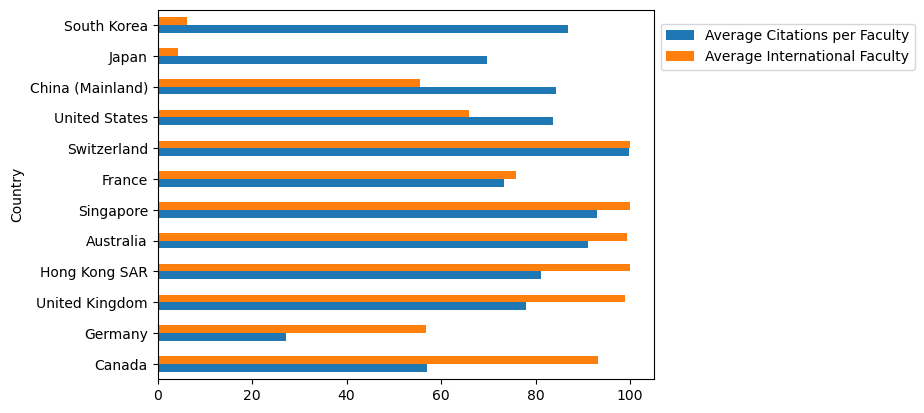

In [382]:
# create the horizontal bar plot using the DataFrame 'country_citations_inter' with the y-axis labelled "Country" 

horizontal_bar_plot(country_citations_inter, "Country")

#### **Question 17:** Create a **scatter plot** representing the `Overall` (on the **x-axis**) against the `Rank` (on the **y-axis**) for **all** institutions in the `Year` *2022*. Additionally, **plot** a **regression line** within the same plot.

You **must** first compute a **DataFrame** containing the **Rank** and the **Overall** data from the `Year` *2022*. You **must** use the `get_regression_line` function to compute the best fit line.

Points possible: 6.0

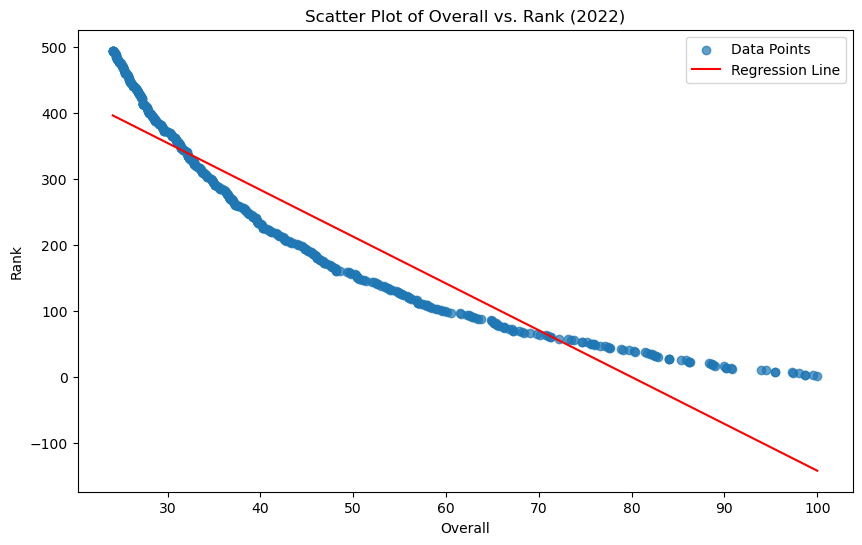

In [386]:
# first compute and store the DataFrame 'overall_rank', then display its head
# do NOT plot just yet
def get_regression_line(df, x, y):
    """Adds a 'fit' column to the dataframe for the regression line."""
    x_values = df[x]
    y_values = df[y]
    
    m, b = np.polyfit(x_values, y_values, 1)
    
    df['fit'] = m * x_values + b
    return df

with sqlite3.connect("rankings.db") as conn:
    overall_rank = pd.read_sql("""
        SELECT `Rank`, `Overall`
        FROM rankings
        WHERE `Year` = 2022
          AND `Rank` IS NOT NULL
          AND `Overall` IS NOT NULL
    """, conn)

overall_rank = get_regression_line(overall_rank, 'Overall', 'Rank')

plt.figure(figsize=(10, 6))
plt.scatter(overall_rank['Overall'], overall_rank['Rank'], label='Data Points', alpha=0.7)
plt.plot(overall_rank['Overall'], overall_rank['fit'], color='red', label='Regression Line')

plt.xlabel("Overall")
plt.ylabel("Rank")
plt.title("Scatter Plot of Overall vs. Rank (2022)")
plt.legend()
plt.show()


Make sure you saved the notebook before running this cell. Running check for q17...


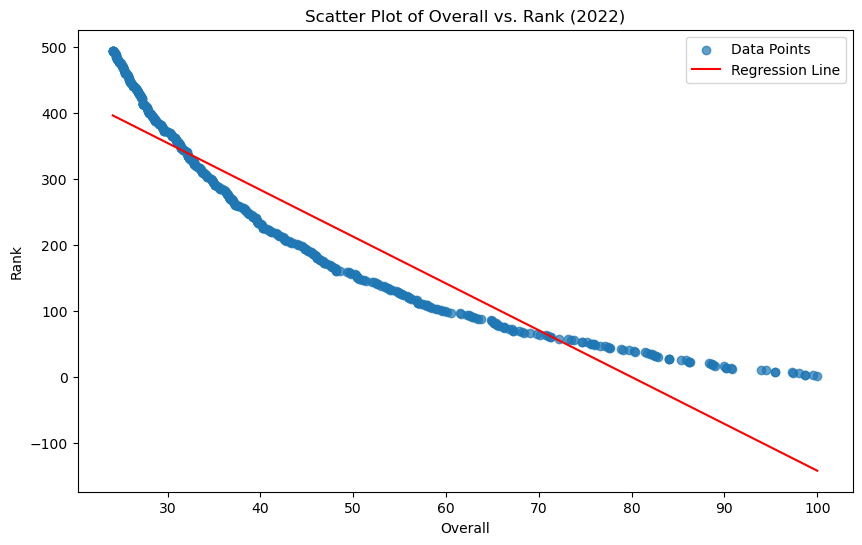

Great job! You passed all test cases for this question.


True

In [387]:
student_grader.check("q17", should_get_llm_feedback=False)

Now, **plot** `overall_rank` as **scatter plot** with a **regression line** with the **x-axis** labelled *Overall* and the **y-axis** labelled *Rank*.

You **must** use the `regression_line_plot` function to plot this data. Your plot should look like this:

<div style="text-align: center;"><img src="images/q17.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

In [ ]:
# create the scatter plot and the regression line using the DataFrame 'overall_rank' with the x-axis labelled "Overall" 
# and the y-axis labelled "Rank"

# regression_line_plot(..., ..., ...)

**Food for thought:** Does our linear regression model fit the points well? It looks like the relationship between the `Overall` and `Rank` is **not quite linear**. In fact, a cursory look at the data suggests that the relationship is in fact, inverse.

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


#### **Question 18:** Create a **scatter plot** representing the **inverse** of the `Overall` (on the **x-axis**) against the `Rank` (on the **y-axis**) for **all** institutions in the `Year` *2022*. Additionally, **plot** a **regression line**  within the same plot.

The `Inverse Overall` for each institution is simply defined as `1/Overall` for that institution. You **must** first compute a **DataFrame** containing the **Rank** and the **Inverse Overall** data from the `Year` *2022*. You **must** use the `get_regression_line` function to compute the best fit line.

Points possible: 6.0

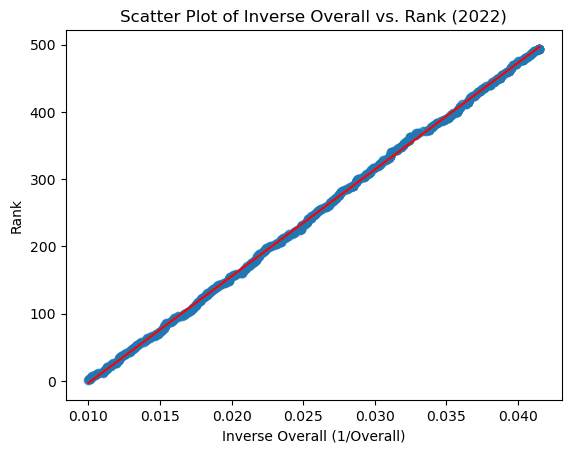

In [390]:
# first compute and store the DataFrame 'inverse_overall_rank', then display its head
# do NOT plot just yet

with sqlite3.connect("rankings.db") as conn:
    inverse_overall_rank = pd.read_sql("""
        SELECT 
            `Rank`, 
            1.0 / `Overall` AS "Inverse Overall"
        FROM rankings
        WHERE `Year` = 2022
          AND `Rank` IS NOT NULL
          AND `Overall` IS NOT NULL
    """, conn)

inverse_overall_rank = get_regression_line(inverse_overall_rank, 'Inverse Overall', 'Rank')

plt.scatter(inverse_overall_rank['Inverse Overall'], inverse_overall_rank['Rank'], alpha=0.7)
plt.plot(inverse_overall_rank['Inverse Overall'], inverse_overall_rank['fit'], color='red')

plt.xlabel("Inverse Overall (1/Overall)")
plt.ylabel("Rank")
plt.title("Scatter Plot of Inverse Overall vs. Rank (2022)")
plt.show()

Make sure you saved the notebook before running this cell. Running check for q18...


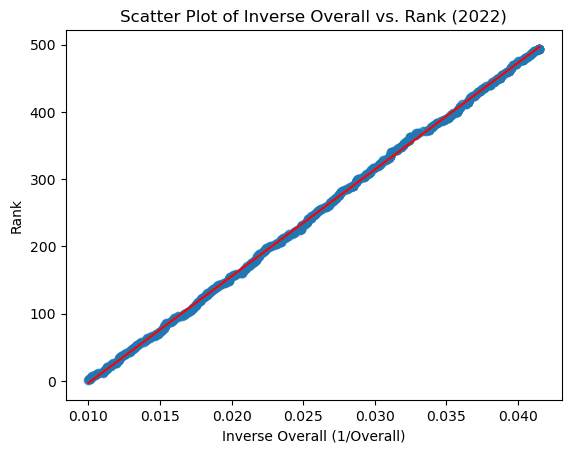

Great job! You passed all test cases for this question.


True

In [391]:
student_grader.check("q18", should_get_llm_feedback=False)

Now, **plot** `inverse_overall_rank` as **scatter plot** with a **regression line** with the **x-axis** labelled *Inverse Overall* and the **y-axis** labelled *Rank*.

You **must** use the `regression_line_plot` function to plot this data. Your plot should look like this:

<div style="text-align: center;"><img src="images/q18.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

In [396]:
# create the scatter plot and the regression line using the DataFrame 'inverse_overall_rank'
# with the x-axis labelled "Inverse Overall" and the y-axis labelled "Rank"

# regression_line_plot(..., ..., ...)

This seems to be much better! Let us now use this **regression line** to **estimate** the `Rank` of an institution given its `Overall`.

#### **Question 19:** Use the regression line to **estimate** the `Rank` of an institution with an `Overall` of *72*.

Your output **must** be an **int**. If your **estimate** is a **float**, *round it up* using `math.ceil`.


**Hints:**
1. Call the `get_regression_coeff` function to get the coefficients `m` and `b`.
2. Recall that the equation of a line is `y = m * x + b`. What are `x` and `y` here?

Points possible: 6.0

In [399]:
# compute and store the answer in the variable 'rank_score_72', then display it
m, b = get_regression_coeff(inverse_overall_rank, 'Inverse Overall', 'Rank')
rank_score_72 = math.ceil(m * (1.0 / 72) + b)

rank_score_72

59

In [400]:
student_grader.check("q19", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for q19...
Great job! You passed all test cases for this question.


True

**Food for thought:** Can you find out the `Overall` of the university with this `Rank` in the `Year` *2022*? Does it match your prediction?

In [404]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


Using the data from Question 5, create a **pie plot** representing the number of institutions from each country.

You **have** already computed a **DataFrame** `num_institutions` (in Question 5) containing the **Country**, and the **Number of Insititutions** data. Now, **plot** `num_institutions` as **pie plot** with the **title** *Number of Institutions*.

You **must** use the `pie_plot` function to create the **pie plot**. The **colors** do **not** matter, but the plot **must** be titled `Number of Institutions`, and **must** be labelled as in the sample output below. Your plot should look like this:

<div style="text-align: center;"><img src="images/q20.jpg" style="height: 400px;"/></div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

In [408]:
# create the pie plot using the DataFrame 'num_institutions' titled "Number of Institutions"

# pie_plot(..., ..., ..., ...)

### Closing the database connection:

Now, before you **submit** your notebook, you **must** **close** your connection `conn`. Not doing this might make **Gradescope fail**. Additionally, **delete** the example images provided with plot questions to save space, if your notebook file is too large for submission. You can **delete** any cell by selecting the cell, hitting the `Esc` key once, and then hitting the `d` key **twice**.

In [411]:
# close your connection here
conn.close()

## Submission

Make sure you have run all cells in your notebook in order before submitting on Gradescope. Your notebook should not contain any uncaught Exceptions, otherwise the Gradescope autograder will not give you any points.